In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime

In [2]:
dataset=pd.read_csv("C:/Users/vasista/Desktop/Academics/MAJOR/india-air-quality-data/hyd_No2_pollution_data_completeValues.csv")
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])    
df = indexedDataset.copy()

In [3]:
from datetime import datetime
indexedDataset.tail(5)

,No2
Date,
2015-12-16,22.0
2015-12-19,26.0
2015-12-22,15.0
2015-12-27,24.0
2015-12-29,19.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


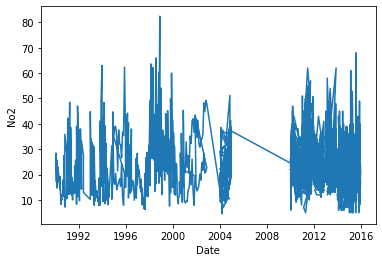

In [4]:
#plot graph

plt.xlabel("Date")
plt.ylabel("No2")
plt.plot(indexedDataset)

In [13]:
#determining rolling statistics
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                  No2
Date                 
1990-02-01        NaN
1990-02-01        NaN
1990-03-01        NaN
1990-03-01        NaN
1990-04-01        NaN
...               ...
2015-12-16  27.333333
2015-12-19  27.583333
2015-12-22  25.833333
2015-12-27  26.000000
2015-12-29  26.000000

[2684 rows x 1 columns]                  No2
Date                
1990-02-01       NaN
1990-02-01       NaN
1990-03-01       NaN
1990-03-01       NaN
1990-04-01       NaN
...              ...
2015-12-16  5.432785
2015-12-19  5.282188
2015-12-22  5.702206
2015-12-27  5.608435
2015-12-29  5.608435

[2684 rows x 1 columns]


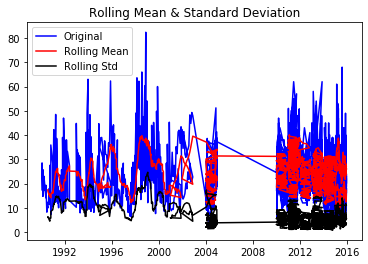

In [14]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label="Rolling Std")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
#perform Dickey Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest=adfuller(indexedDataset['No2'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number Of Obaservations Used'])
for key ,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
dtype: float64
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
Critical Value(5%)             -2.862623e+00
dtype: float64
Test Statistic                 -6.397419e+00
p-value                         2.034549e-08
#Lags used                      1.300000e+01
Number Of Obaservations Used    2.670000e+03
Critical Value(1%)             -3.432802e+00
Critical Value(5%)             -2.862623e+00
Critical Value(10%)            -2.567347e+00
dtype: float64


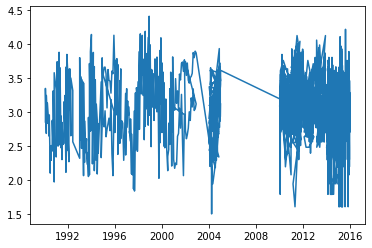

In [8]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

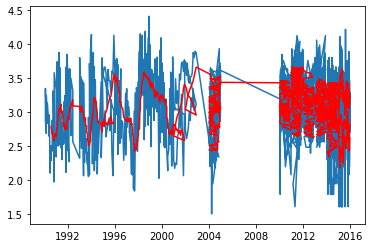

In [9]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [10]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#removing NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,No2
Date,
1990-08-01,-0.502015
1990-08-01,-0.256045
1990-09-01,-0.247667
1990-09-01,0.173238
1990-10-01,-0.212684
1990-10-01,0.637107
1990-11-01,-0.606213
1990-11-01,0.945645
1991-01-01,0.639943


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(indexedDataset):
    #determining rolling statistics
    movingAverage=indexedDataset.rolling(window=12).mean()
    movingSTD=indexedDataset.rolling(window=12).std()
    
    #plot rolling Statistics:
    orig=plt.plot(indexedDataset,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label="Rolling Std")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #perform Dickey Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(indexedDataset['No2'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value',
                '#Lags used','Number Of Observations Used'])
    for key ,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)

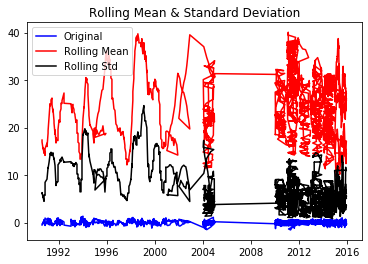

Results of Dickey Fuller Test:
Test Statistic                -1.513816e+01
p-value                        7.073229e-28
#Lags used                     1.500000e+01
Number Of Observations Used    2.657000e+03
Critical Value(1%)            -3.432814e+00
Critical Value(5%)            -2.862628e+00
Critical Value(10%)           -2.567349e+00
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

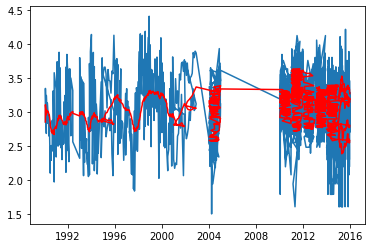

In [13]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

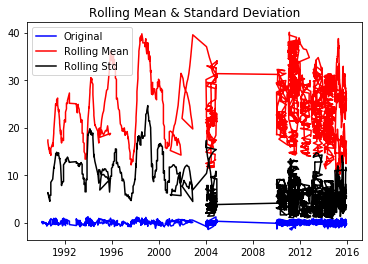

Results of Dickey Fuller Test:
Test Statistic                -1.107284e+01
p-value                        4.508254e-20
#Lags used                     1.500000e+01
Number Of Observations Used    2.668000e+03
Critical Value(1%)            -3.432803e+00
Critical Value(5%)            -2.862624e+00
Critical Value(10%)           -2.567347e+00
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

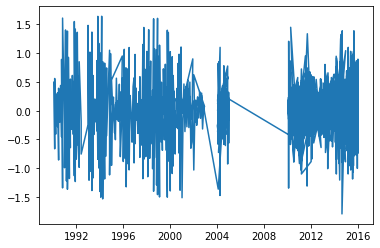

In [15]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

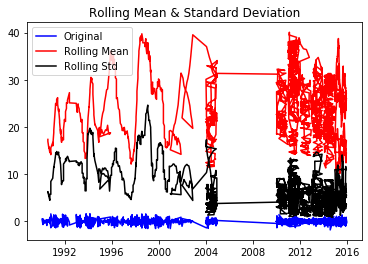

Results of Dickey Fuller Test:
Test Statistic                -1.670250e+01
p-value                        1.457232e-29
#Lags used                     1.900000e+01
Number Of Observations Used    2.663000e+03
Critical Value(1%)            -3.432808e+00
Critical Value(5%)            -2.862626e+00
Critical Value(10%)           -2.567348e+00
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

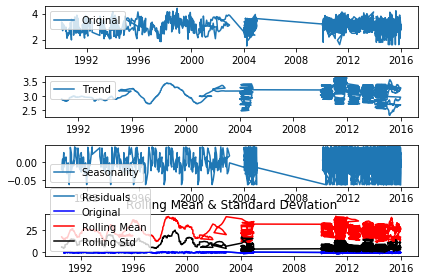

Results of Dickey Fuller Test:
Test Statistic                -1.435561e+01
p-value                        1.004633e-26
#Lags used                     2.800000e+01
Number Of Observations Used    2.625000e+03
Critical Value(1%)            -3.432844e+00
Critical Value(5%)            -2.862642e+00
Critical Value(10%)           -2.567356e+00
dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale,freq=30)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


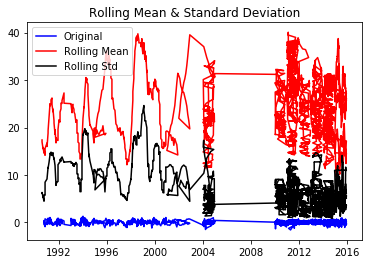

Results of Dickey Fuller Test:
Test Statistic                -1.435561e+01
p-value                        1.004633e-26
#Lags used                     2.800000e+01
Number Of Observations Used    2.625000e+03
Critical Value(1%)            -3.432844e+00
Critical Value(5%)            -2.862642e+00
Critical Value(10%)           -2.567356e+00
dtype: float64


In [18]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


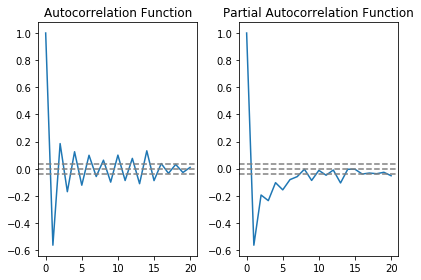

In [19]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plotPACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


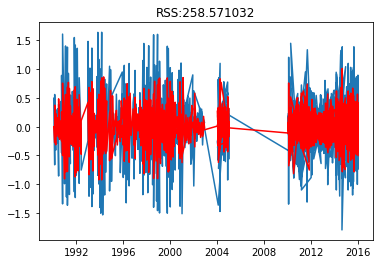

In [20]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model=ARIMA(indexedDataset_logScale,order=(1,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting["No2"])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


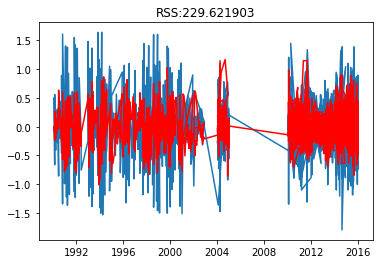

In [21]:
#MA MODEL
model=ARIMA(indexedDataset_logScale,order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["No2"])**2))
print('Plotting MA model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS:229.017882')

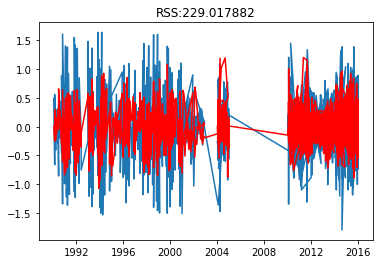

In [22]:
model=ARIMA(indexedDataset_logScale,order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["No2"])**2))

In [27]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
1990-02-01    0.000049
1990-03-01   -0.255528
1990-03-01    0.296035
1990-04-01   -0.218326
1990-04-01    0.163448
dtype: float64


In [28]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
1990-02-01    0.000049
1990-03-01   -0.255480
1990-03-01    0.040555
1990-04-01   -0.177771
1990-04-01   -0.014323
                ...   
2015-12-16   -0.621142
2015-12-19   -0.403318
2015-12-22   -0.378997
2015-12-27    0.082864
2015-12-29    0.040897
Length: 2683, dtype: float64


In [29]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['No2'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1990-02-01    2.856519
1990-02-01    2.856519
1990-03-01    2.600991
1990-03-01    2.897025
1990-03-01    2.600991
dtype: float64

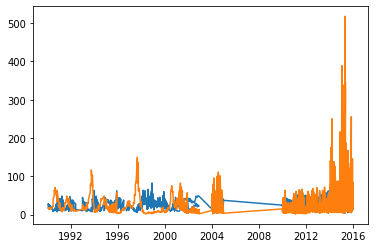

In [30]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [31]:
indexedDataset_logScale

,No2
Date,
1990-02-01,2.856470
1990-02-01,3.349904
1990-03-01,2.687847
1990-03-01,3.246491
1990-04-01,2.839078
...,...
2015-12-16,3.091042
2015-12-19,3.258097
2015-12-22,2.708050


In [32]:
results_ARIMA.forecast(steps=360)

(array([3.10242574, 3.09035317, 3.091332  , 3.09130919, 3.09136324,
        3.0914114 , 3.09146001, 3.09150859, 3.09155716, 3.09160574,
        3.09165432, 3.0917029 , 3.09175147, 3.09180005, 3.09184863,
        3.09189721, 3.09194579, 3.09199436, 3.09204294, 3.09209152,
        3.0921401 , 3.09218867, 3.09223725, 3.09228583, 3.09233441,
        3.09238298, 3.09243156, 3.09248014, 3.09252872, 3.09257729,
        3.09262587, 3.09267445, 3.09272303, 3.09277161, 3.09282018,
        3.09286876, 3.09291734, 3.09296592, 3.09301449, 3.09306307,
        3.09311165, 3.09316023, 3.0932088 , 3.09325738, 3.09330596,
        3.09335454, 3.09340312, 3.09345169, 3.09350027, 3.09354885,
        3.09359743, 3.093646  , 3.09369458, 3.09374316, 3.09379174,
        3.09384031, 3.09388889, 3.09393747, 3.09398605, 3.09403462,
        3.0940832 , 3.09413178, 3.09418036, 3.09422894, 3.09427751,
        3.09432609, 3.09437467, 3.09442325, 3.09447182, 3.0945204 ,
        3.09456898, 3.09461756, 3.09466613, 3.09

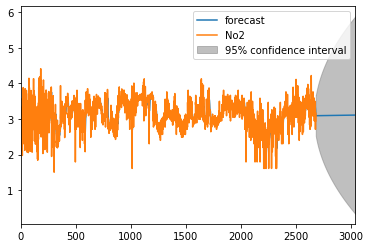

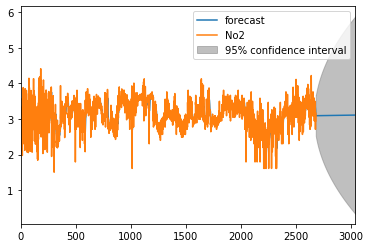

In [33]:
results_ARIMA.plot_predict(1,3044)